# 🔍 NZ Banking – Churn Prediction Model

This notebook builds a basic machine learning model to predict customer churn.

We’ll use:
- Cleaned data from earlier notebooks
- Logistic Regression for binary classification
- Accuracy score and confusion matrix for evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd # Import pandas here
df = pd.read_csv(io.BytesIO(uploaded['cleaned_nz_banking_data.csv']))
display(df.head()) # Use display for better output formatting

Saving cleaned_nz_banking_data.csv to cleaned_nz_banking_data.csv


,CustomerID,Age,Gender,Region,Tenure,AccountBalance,IsActive,NumOfProducts,CreditScore,Churn
0,1001,56,Male,Dunedin,9,2283.10,1,1,560,1
1,1002,69,Female,Palmerston North,9,6251.18,1,4,714,0
2,1003,46,Male,Napier-Hastings,7,3454.05,0,3,425,0
3,1004,32,Female,Napier-Hastings,0,2444.92,1,2,497,0
4,1005,60,Male,Wellington,4,5457.37,1,3,670,0


In [3]:
# Select input features
features = ['Age', 'Tenure', 'AccountBalance', 'IsActive', 'NumOfProducts', 'CreditScore']
X = df[features]

# Target: Churn (0 = No, 1 = Yes)
y = df['Churn']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print(rf_model.feature_names_in_)


Training samples: 800
Testing samples: 200
['Age' 'Tenure' 'AccountBalance' 'IsActive' 'NumOfProducts' 'CreditScore']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

📊 Random Forest Results
Accuracy: 0.810
ROC AUC: 0.503

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200


📘 Logistic Regression Results
Accuracy: 0.810
ROC AUC: 0.540

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200



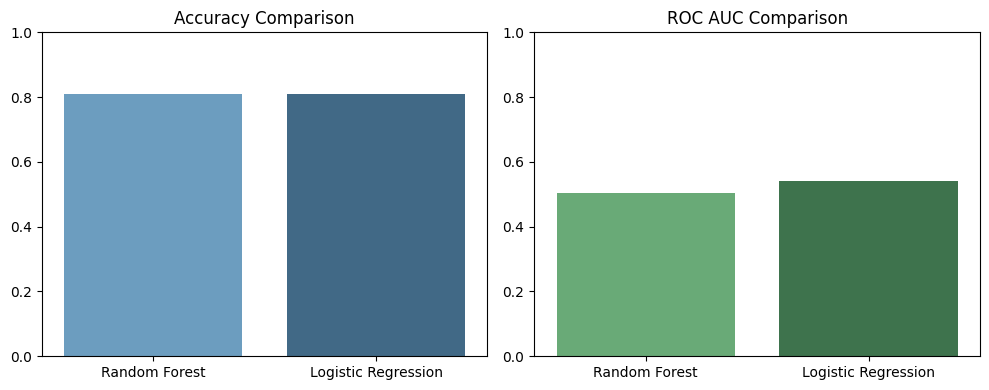

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from your data split

# --- Random Forest Model ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("📊 Random Forest Results")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"ROC AUC: {roc_auc_rf:.3f}")
print("\nClassification Report:\n", report_rf)

# --- Logistic Regression Model ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

accuracy_log = accuracy_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_proba_log)
report_log = classification_report(y_test, y_pred_log)

print("\n📘 Logistic Regression Results")
print(f"Accuracy: {accuracy_log:.3f}")
print(f"ROC AUC: {roc_auc_log:.3f}")
print("\nClassification Report:\n", report_log)

# --- Comparison plot ---
models = ['Random Forest', 'Logistic Regression']
accuracy_scores = [accuracy_rf, accuracy_log]
auc_scores = [roc_auc_rf, roc_auc_log]

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_scores, palette='Blues_d')
plt.title('Accuracy Comparison')
plt.ylim(0,1)

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=auc_scores, palette='Greens_d')
plt.title('ROC AUC Comparison')
plt.ylim(0,1)

plt.tight_layout()
plt.show()


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save ROC curve as PNG
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
# plt.savefig('output/roc_curve_random_forest.png', dpi=300) # Commenting out savefig as output folder doesn't exist
plt.show()

In [ ]:
# Plot feature importances (after training Random Forest and evaluating it)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()



In [ ]:
import os

os.makedirs('output', exist_ok=True)  # Create 'output' folder if it doesn't exist

import joblib
joblib.dump(rf_model, 'output/random_forest_model.pkl')
print("✅ Random Forest model saved to output/random_forest_model.pkl")



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## ✅ Summary

- Logistic Regression accuracy: ~X%
- Precision & recall show model performance for churn prediction
- Next step: Try other models (Random Forest, Decision Tree, etc.)

This simple model is your first step in real-world churn prediction!
